In this Notebook we will learn the fundementals of how to accomplish
grouping with K-means and use it for segmenting mall customers and images.

In [1]:
# Import the required packages.
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Download the dataset and read it into a pandas dataframe
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/CustomerData.csv', index_col=0)


In [3]:
# Display the dataset
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


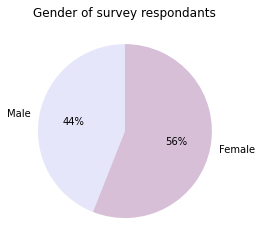

In [8]:
# Getting familier with the data
# Let's look at distributions of some of the features.
# Lets analyse the ratio of male and female customers
num_male = df[df['Gender'] == 'Male'].shape[0]
num_female = df[df['Gender'] == 'Female'].shape[0]
plt.pie(
    [num_male, num_female],
    labels=['Male' , 'Female'],
    startangle=90,
    autopct='%1.f%%',
    colors=['lavender', 'thistle']
)
plt.title('Gender of survey respondants')
plt.show()

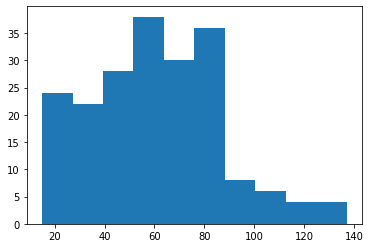

In [12]:
# Lets plot histogram of the age and annual incomes of the customers 
plt.hist(df['Annual Income (k$)'] , bins=10)

plt.show()

The distribution is skewed to the right.
Not many customers are earning over 100K per year.

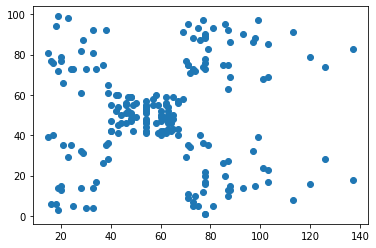

In [13]:
# Take a look at the customers annual income vs spending score
X = df[['Annual Income (k$)' , 'Spending Score (1-100)']]
plt.scatter(X['Annual Income (k$)'] , X['Spending Score (1-100)'])
plt.show()

We can see that the customers earning less than 100K/annual are relatively spending more.
we can categorize our customers into 5 groups
1. Low income, High spending
2. low income, low spending
3. High income, low spending
4. high income, high spending
5. Medium income, medium spending 

In [14]:
# Clustering the data using K-means
# Since we have 5 categories the value for k = 5
km = KMeans(n_clusters=5, random_state=42)
km.fit(X)

KMeans(n_clusters=5, random_state=42)

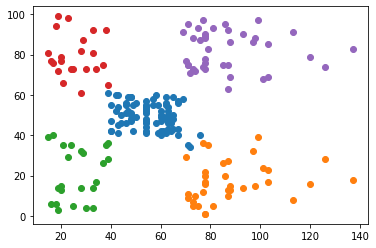

In [15]:
for label in np.unique(km.labels_):
    X_ = X[label == km.labels_]
    plt.scatter(X_['Annual Income (k$)'], X_['Spending Score (1-100)'], label=label)
plt.show()